# **CS/CE 457/464 - Homework Assignment 11: Deep Learning**

### Breeha Qasim 08283

###### bq08283@st.habib.edu.pk

In [321]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter

## Q1

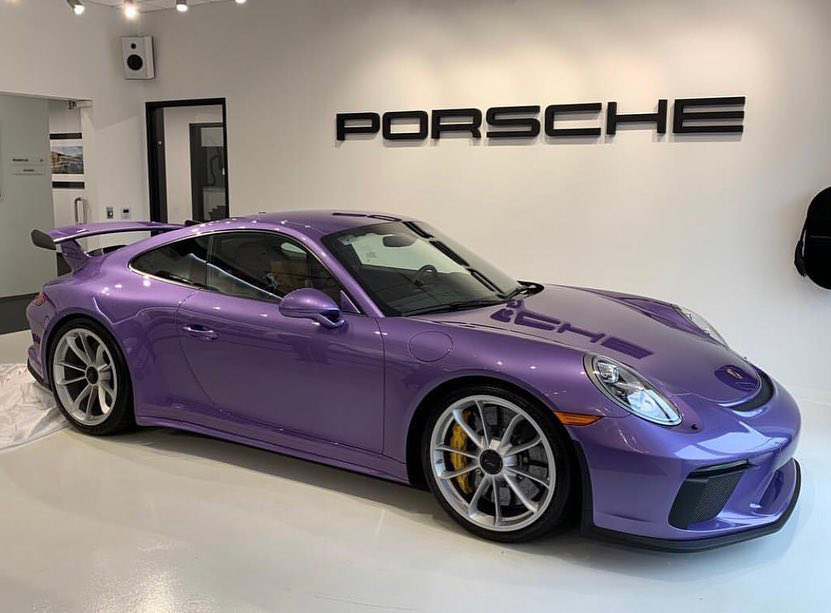

In [328]:
img = Image.open("Q1.jpg")
img = img.convert("RGB")
img

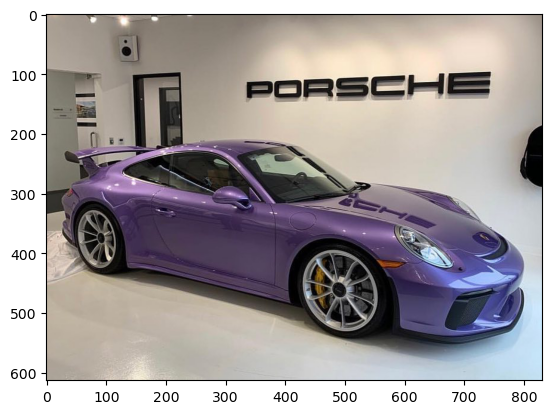

In [324]:
plt.imshow(img)
plt.show()

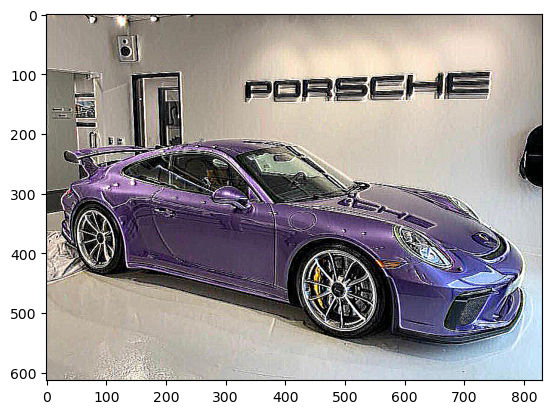

In [355]:
img2 = img.filter(ImageFilter.Kernel((3, 3), 
      (-1, -1, -1, -1, -1, 9, -1, -1, -1), 1, 0))
plt.imshow(img2)
plt.show()

##### **^Explanation/Reasoning:** The applied filter is an edge-enhancement kernel with a high centre value (9) and negative surrounding values (-1). Its purpose is to sharpen edges by amplifying intensity differences. The output correctly highlights edges and contours, aligning with its intended purpose.

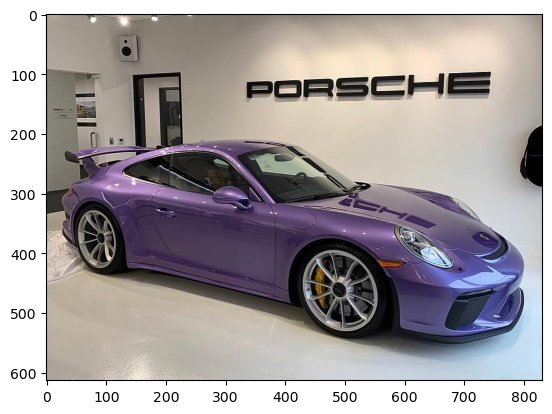

In [358]:
image_detail = img.filter(filter=ImageFilter.DETAIL)
plt.imshow(image_detail)
plt.show()

##### **^Explanation/Reasoning:** By modifying pixel intensity to make complex elements more visible, the **DETAIL** filter brings out the finer details in the picture. The output successfully accomplishes the filter's goal by maintaining clarity while delicately enhancing the texture and environment of the car.

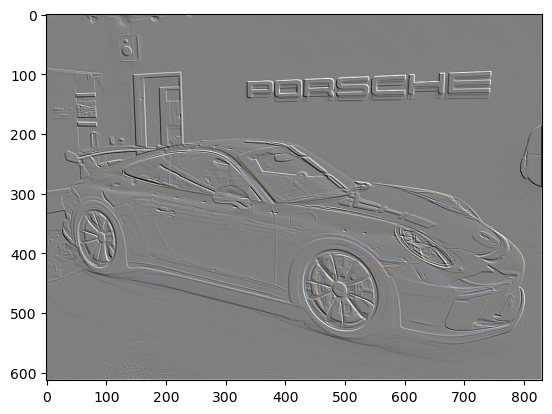

In [361]:
image_emboss = img.filter(filter=ImageFilter.EMBOSS)
plt.imshow(image_emboss)
plt.show()

##### **^Explanation/Reasoning:** The **EMBOSS** filter highlights edges and gives the image depth-like shading to produce a three-dimensional impression. It highlights an object's shape and structure, as seen in the automobile and logo. By creating a relief-like effect that heightens the sense of depth, the output accurately reflects its intended use.

## Q2

In [365]:
# !pip install tensorflow

In [367]:
import tensorflow as tf

# Use tf.keras.preprocessing.image.ImageDataGenerator instead
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

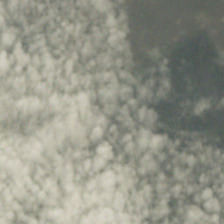

In [369]:
img = Image.open("dataset/train/cloudy/train_101.jpg")
img

In [371]:
img.mode

'CMYK'

In [373]:
#Get pixel data for each channel
M = np.asarray(img)
M.shape

(224, 224, 4)

## (a)

In [376]:
### More settings
train_data_dir = 'dataset/train'
test_data_dir = 'dataset/test'
nb_train_samples = 400
nb_test_samples = 100
epochs = 10
batch_size = 4

In [378]:
### Every image in the dataset is of the size 256*256.
img_width, img_height = 224, 224

In [380]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64)) #fully connected deep learning network
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [382]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

Found 100 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5060 - loss: -1445.8837 - val_accuracy: 0.5000 - val_loss: -6665.9912
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4875 - loss: -27763.5508 - val_accuracy: 0.5000 - val_loss: -66090.1953
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5009 - loss: -138513.9219 - val_accuracy: 0.5000 - val_loss: -258081.5000
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5084 - loss: -448652.5938 - val_accuracy: 0.5000 - val_loss: -709963.6250
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5055 - loss: -1196242.5000 - val_accuracy: 0.5000 - val_loss: -1575143.7500
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4951 - loss: -2520843.0000 - val_accuracy: 0.5000 - val_loss: -3060452.2500
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5069 - l

In [384]:
model.save('cloudy_desert_model.keras')

## (b)

In [387]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
 
from keras.models import load_model
 
model = load_model('cloudy_desert_model.keras')

## (1)

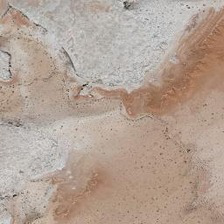

In [390]:
 img = Image.open("dataset/extra/desert(68).jpg")
 img = img.convert("RGB")
 img

In [392]:
image = load_img("dataset/extra/desert(68).jpg", target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Desert"
else:
    out = "1 - Cloudy"

print("Class (0-Desert , 1-Cloudy) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Class (0-Desert , 1-Cloudy) and prediction is:  1 - Cloudy


# label[0][0]

## (2)

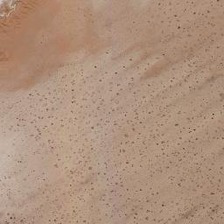

In [287]:
 img = Image.open("dataset/extra/desert(70).jpg")
 img = img.convert("RGB")
 img

In [288]:
image = load_img("dataset/extra/desert(70).jpg", target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Desert"
else:
    out = "1 - Cloudy"

print("Class (0-Desert , 1-Cloudy) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Class (0-Desert , 1-Cloudy) and prediction is:  1 - Cloudy


In [289]:
label[0][0]

1.0

## (3)

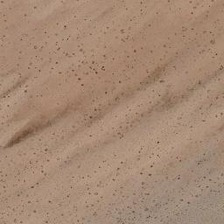

In [291]:
 img = Image.open("dataset/extra/desert(72).jpg")
 img = img.convert("RGB")
 img

In [292]:
image = load_img("dataset/extra/desert(72).jpg", target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Desert"
else:
    out = "1 - Cloudy"

print("Class (0-Desert , 1-Cloudy) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Class (0-Desert , 1-Cloudy) and prediction is:  1 - Cloudy


In [293]:
label[0][0]

1.0

## (4)

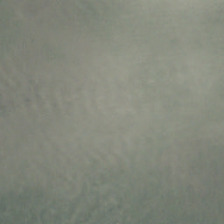

In [295]:
 img = Image.open("dataset/extra/train_1670.jpg")
 img = img.convert("RGB")
 img

In [296]:
image = load_img("dataset/extra/train_1670.jpg", target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Desert"
else:
    out = "1 - Cloudy"

print("Class (0-Desert , 1-Cloudy) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Class (0-Desert , 1-Cloudy) and prediction is:  1 - Cloudy


In [297]:
label[0][0]

1.0

## (5)

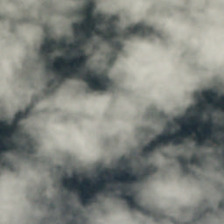

In [299]:
 img = Image.open("dataset/extra/train_1698.jpg")
 img = img.convert("RGB")
 img

In [300]:
image = load_img("dataset/extra/train_1698.jpg", target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Desert"
else:
    out = "1 - Cloudy"

print("Class (0-Desert , 1-Cloudy) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Class (0-Desert , 1-Cloudy) and prediction is:  1 - Cloudy


In [301]:
label[0][0]

1.0

## (6)

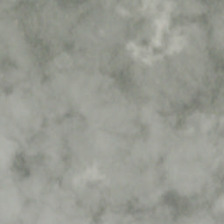

In [303]:
 img = Image.open("dataset/extra/train_1704.jpg")
 img = img.convert("RGB")
 img

In [304]:
image = load_img("dataset/extra/train_1704.jpg", target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Desert"
else:
    out = "1 - Cloudy"

print("Class (0-Desert , 1-Cloudy) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Class (0-Desert , 1-Cloudy) and prediction is:  1 - Cloudy


In [305]:
label[0][0]

1.0

##### **^Evaluation:** Even for photographs that visually seem to belong to the "Desert" class, the classifier appears to forecast the incoming images as "Cloudy" (class 1) on a regular basis. This suggests that there may be too much feature learning or overfitting to properly differentiate between the two groups. To increase classification accuracy, the model or dataset must be further refined.